In [1]:
import os

def move_to_parent_dir():
    current_directory = os.getcwd()
    parent_directory = os.path.dirname(current_directory)
    os.chdir(parent_directory)
    print("Working directory:", os.getcwd())

move_to_parent_dir()

Working directory: c:\Users\wwden\OneDrive\Documents\GitHub\dsmp-2024-group-19


In [2]:
from tools import get_LOBs, get_Tapes

LOBs = get_LOBs(2, 0)

Opening UoB_Set01_2025-01-02LOBs.txt
Opening UoB_Set01_2025-01-03LOBs.txt


In [3]:
LOBs[0]

,Exchange,LOB,high_bid,low_ask,mid_price
combined_time,,,,,
2025-01-02 08:00:00.000,Exch0,"[[bid, []], [ask, []]]",NaN,NaN,NaN
2025-01-02 08:00:00.279,Exch0,"[[bid, [[1, 6]]], [ask, []]]",1.0,NaN,NaN
2025-01-02 08:00:01.333,Exch0,"[[bid, [[1, 6]]], [ask, [[800, 1]]]]",1.0,800.0,400.5
2025-01-02 08:00:01.581,Exch0,"[[bid, [[1, 6]]], [ask, [[799, 1]]]]",1.0,799.0,400.0
2025-01-02 08:00:01.643,Exch0,"[[bid, [[1, 6]]], [ask, [[798, 1]]]]",1.0,798.0,399.5
...,...,...,...,...,...
2025-01-02 16:29:59.542,Exch0,"[[bid, [[290, 1], [288, 2], [281, 4], [278, 1]...",290.0,294.0,292.0
2025-01-02 16:29:59.573,Exch0,"[[bid, [[290, 1], [288, 2], [281, 4], [278, 1]...",290.0,294.0,292.0
2025-01-02 16:29:59.635,Exch0,"[[bid, [[290, 1], [288, 2], [281, 4], [278, 1]...",290.0,294.0,292.0


In [37]:
from scipy.sparse import csr_matrix
import numpy as np

df = LOBs[0].head(35_000)
N = len(df)
LOB_arr = csr_matrix((N, 800), dtype = np.int8)

In [38]:
row_i = 0
for i, row in df.iterrows():
    if row_i % 100 == 0:
        print(f"WE ARE ON ROW {row_i}/{N}", end = "\r")

    bids = row["LOB"][0][1]
    asks = row["LOB"][1][1]

    for price, size in bids:
        LOB_arr[row_i, price - 1] = -size

    for price, size in asks:
        LOB_arr[row_i, price - 1] = size

    row_i += 1

c:\Users\wwden\OneDrive\Documents\GitHub\dsmp-2024-group-19\venv\Lib\site-packages\scipy\sparse\_index.py:102: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


In [40]:
from scipy.sparse import save_npz

save_npz("test.npz", LOB_arr)

In [77]:
from scipy.sparse import load_npz

# Load the sparse matrix from the "test.npz" file
loaded_array = load_npz("test.npz")

# Convert the loaded sparse matrix to a dense NumPy array
dense_array = loaded_array.toarray()

dense_array

array([[ 0,  0,  0, ...,  0,  0,  0],
       [-6,  0,  0, ...,  0,  0,  0],
       [-6,  0,  0, ...,  0,  0,  1],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=int8)

In [78]:
def CBS(c):
    col = c.copy()
    col[col >= 0] = 0
    diff = np.abs(np.diff(col))
    return np.sum(diff) + col[0]

def CAS(c):
    col = c.copy()
    col[col <= 0] = 0
    diff = np.abs(np.diff(col))
    return np.sum(diff) + col[0]

cbs = np.apply_along_axis(CBS, axis=0, arr=dense_array)
cas = np.apply_along_axis(CAS, axis=0, arr=dense_array)

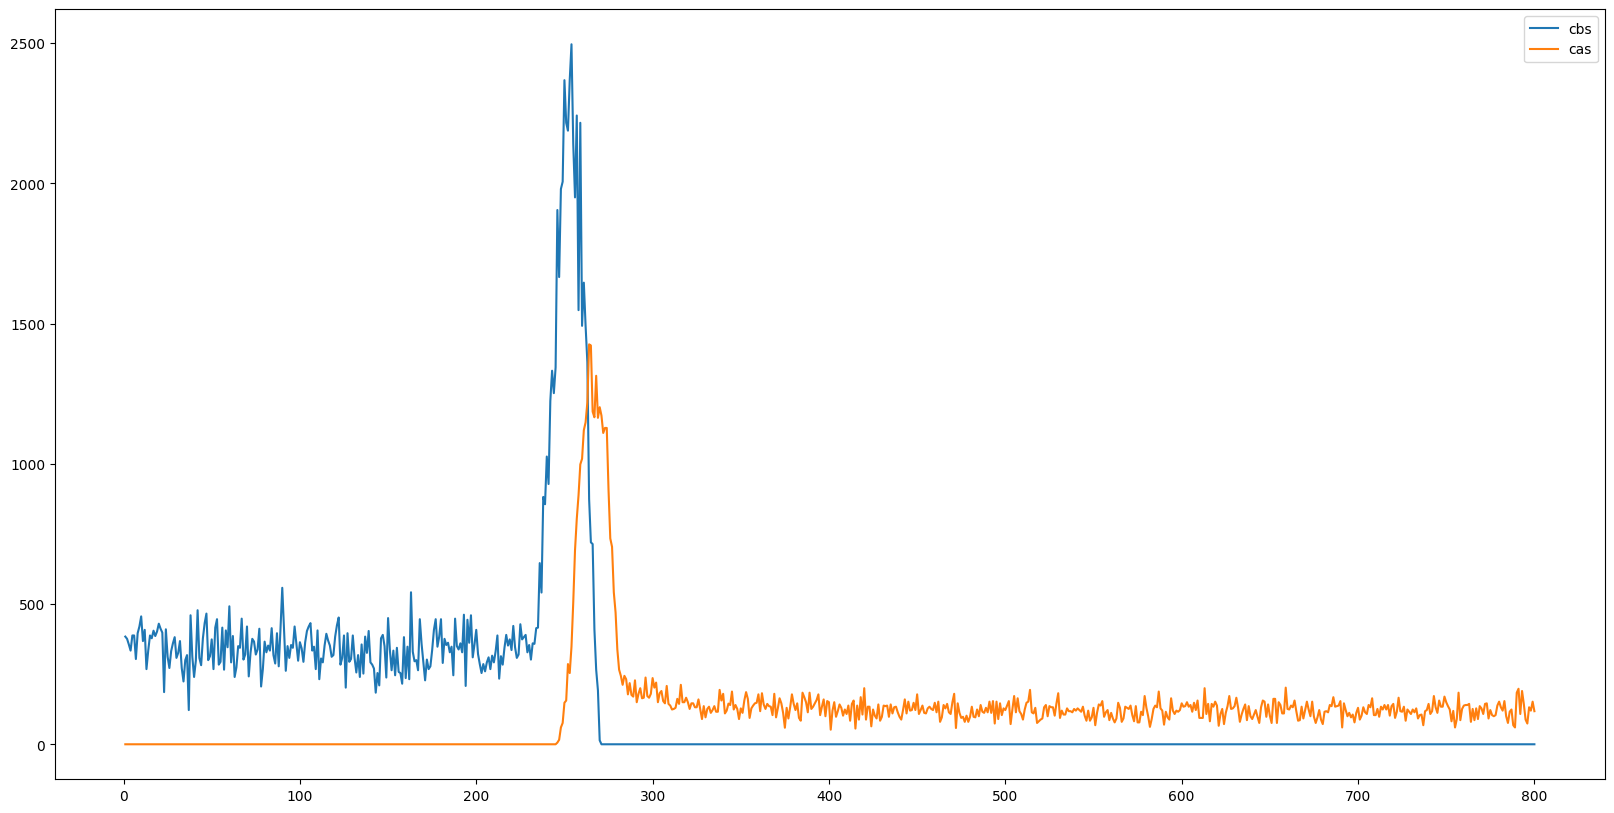

In [79]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(np.arange(1,801),cbs, label="cbs")
plt.plot(np.arange(1,801),cas, label="cas")
plt.legend()

In [68]:
CAS(dense_array[:,799])

0

In [70]:
dense_array[:,799]

35000